This file can be used to compare with the heat map graphs

In [1]:
# from google.colab import drive
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
PATH_TO_DATA = "../pfmdData/data_heatMap"
PATH_TO_GROUND_TRUTH = "../pfmdData/ground_truth_values.csv"

In [15]:
'''
data: Dictionary of data in the format {name of track: track data}

      Track data is the pandas dataframe downloaded from PFMD.net 
      with an additional column "truth_err" that is the difference 
      between the ground truth and the measured value.

      Name of track is the name given on PFMD.net (e.x. z_up_1).
      Name of file refers to the name of the downloaded csv (e.x. 2022-04-12_18-15-47.csv)
  
ground_truth: Dataframe correlating file name, track name, and ground truth of the track.
              The file name is the row index, and track name and ground truth are represented
              as "name" and "ground_truth" respectively.
'''


data = {}
ground_truth = pd.read_csv(PATH_TO_GROUND_TRUTH, index_col=0)
# read data_files into a dictionary
for folder in os.listdir(PATH_TO_DATA):
    print('Reading in data from ' + folder)
    for file_name in os.listdir(PATH_TO_DATA + '/' + folder):
        # Read in the track data
        track = pd.read_csv(PATH_TO_DATA + '/' + folder + '/' + file_name)
        # Get the track name
        if file_name in ground_truth.index:
            name = ground_truth.loc[file_name, 'name']
            # Get the ground truth for the track
            truth = ground_truth.loc[file_name, 'ground_truth']
            # Find the ground truth axis
            axis = name[0] + '_cm'
            # Create a column of error from ground truth
            track['truth_err'] = abs(track[axis] - (truth*100))

            # # Filter our especially large error
            # track = track[track['truth_err'] < 50]

            # Store the track into the dictionary data
            data[name] = track
print("done")

Reading in data from z_far
Reading in data from z_right
Reading in data from z_up
Reading in data from z_up_flipped


In [4]:
temp = data['z_up_1']
not temp[temp['x_cm']>0][temp['x_cm']<20][temp['y_cm']>-80][temp['y_cm']<-60].empty

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


False

<IPython.core.display.Javascript object>


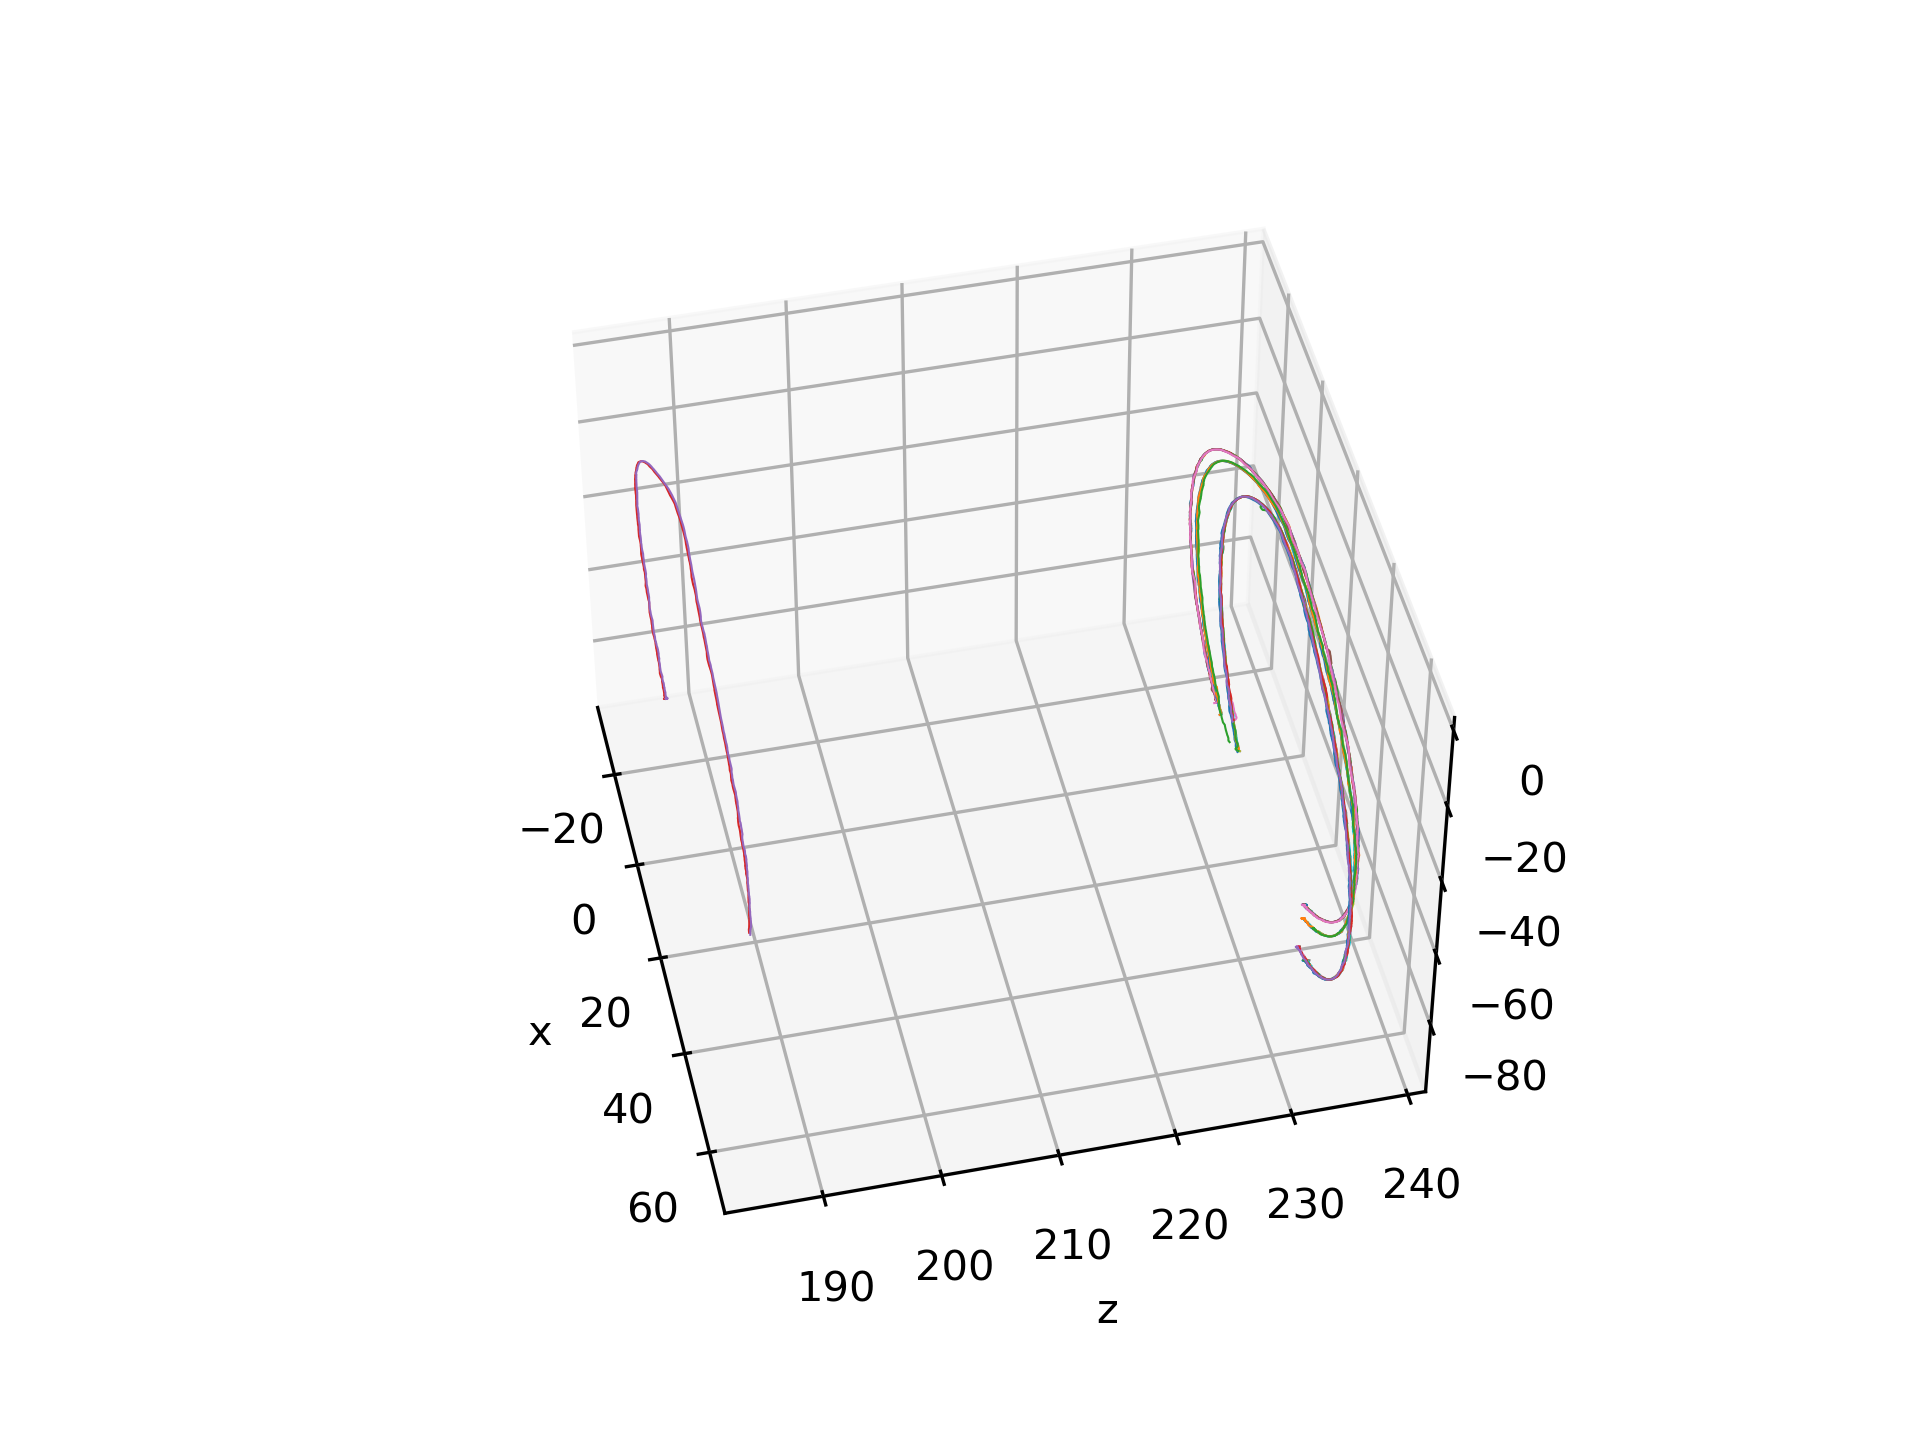

plotted: z_up_1
plotted: z_up_2
plotted: z_up_3
plotted: z_up_4
plotted: z_up_5
plotted: z_up_6
plotted: z_up_7
plotted: z_up_8
plotted: z_up_9
plotted: z_up_10
plotted: z_up_11
plotted: z_up_12
plotted: z_up_13
data values too far off: z_up_14
data values too far off: z_up_15
plotted: z_up_16
plotted: z_up_17
plotted: z_up_18
plotted: z_up_19
plotted: z_up_20
plotted: z_up_21
plotted: z_up_22
plotted: z_up_23
plotted: z_up_24
plotted: z_up_25


Text(0.5, 0, 'z')

In [34]:
%matplotlib notebook
# 2022-04-19_20-25-30
plt.figure(1)
ax = plt.axes(projection='3d')

# plot z_up_xx
for n in range(25):
    file_name = "z_up_" + str(n+1)
    temp = data[file_name]
#     if(not temp[temp['x_cm']>0][temp['x_cm']<20][temp['y_cm']>-80][temp['y_cm']<-60].empty):
#         print("break at: " + file_name)
#         break
    if(not temp[temp['z_cm']>210].empty):
        ax.plot3D(temp['x_cm'], temp['z_cm'], temp['y_cm'], linewidth=0.5)
        print("plotted: " + file_name)
    else:
#         ax.plot3D(temp['x_cm'], temp['z_cm'], temp['y_cm'], linewidth=0.5)
        print("data values too far off: " + file_name)


    

# plt.legend()
plt.xlabel("x")
plt.ylabel("z")
# plt.ylim(181,185)
# plt.zlabel("z")
# plt.ioff()


<IPython.core.display.Javascript object>


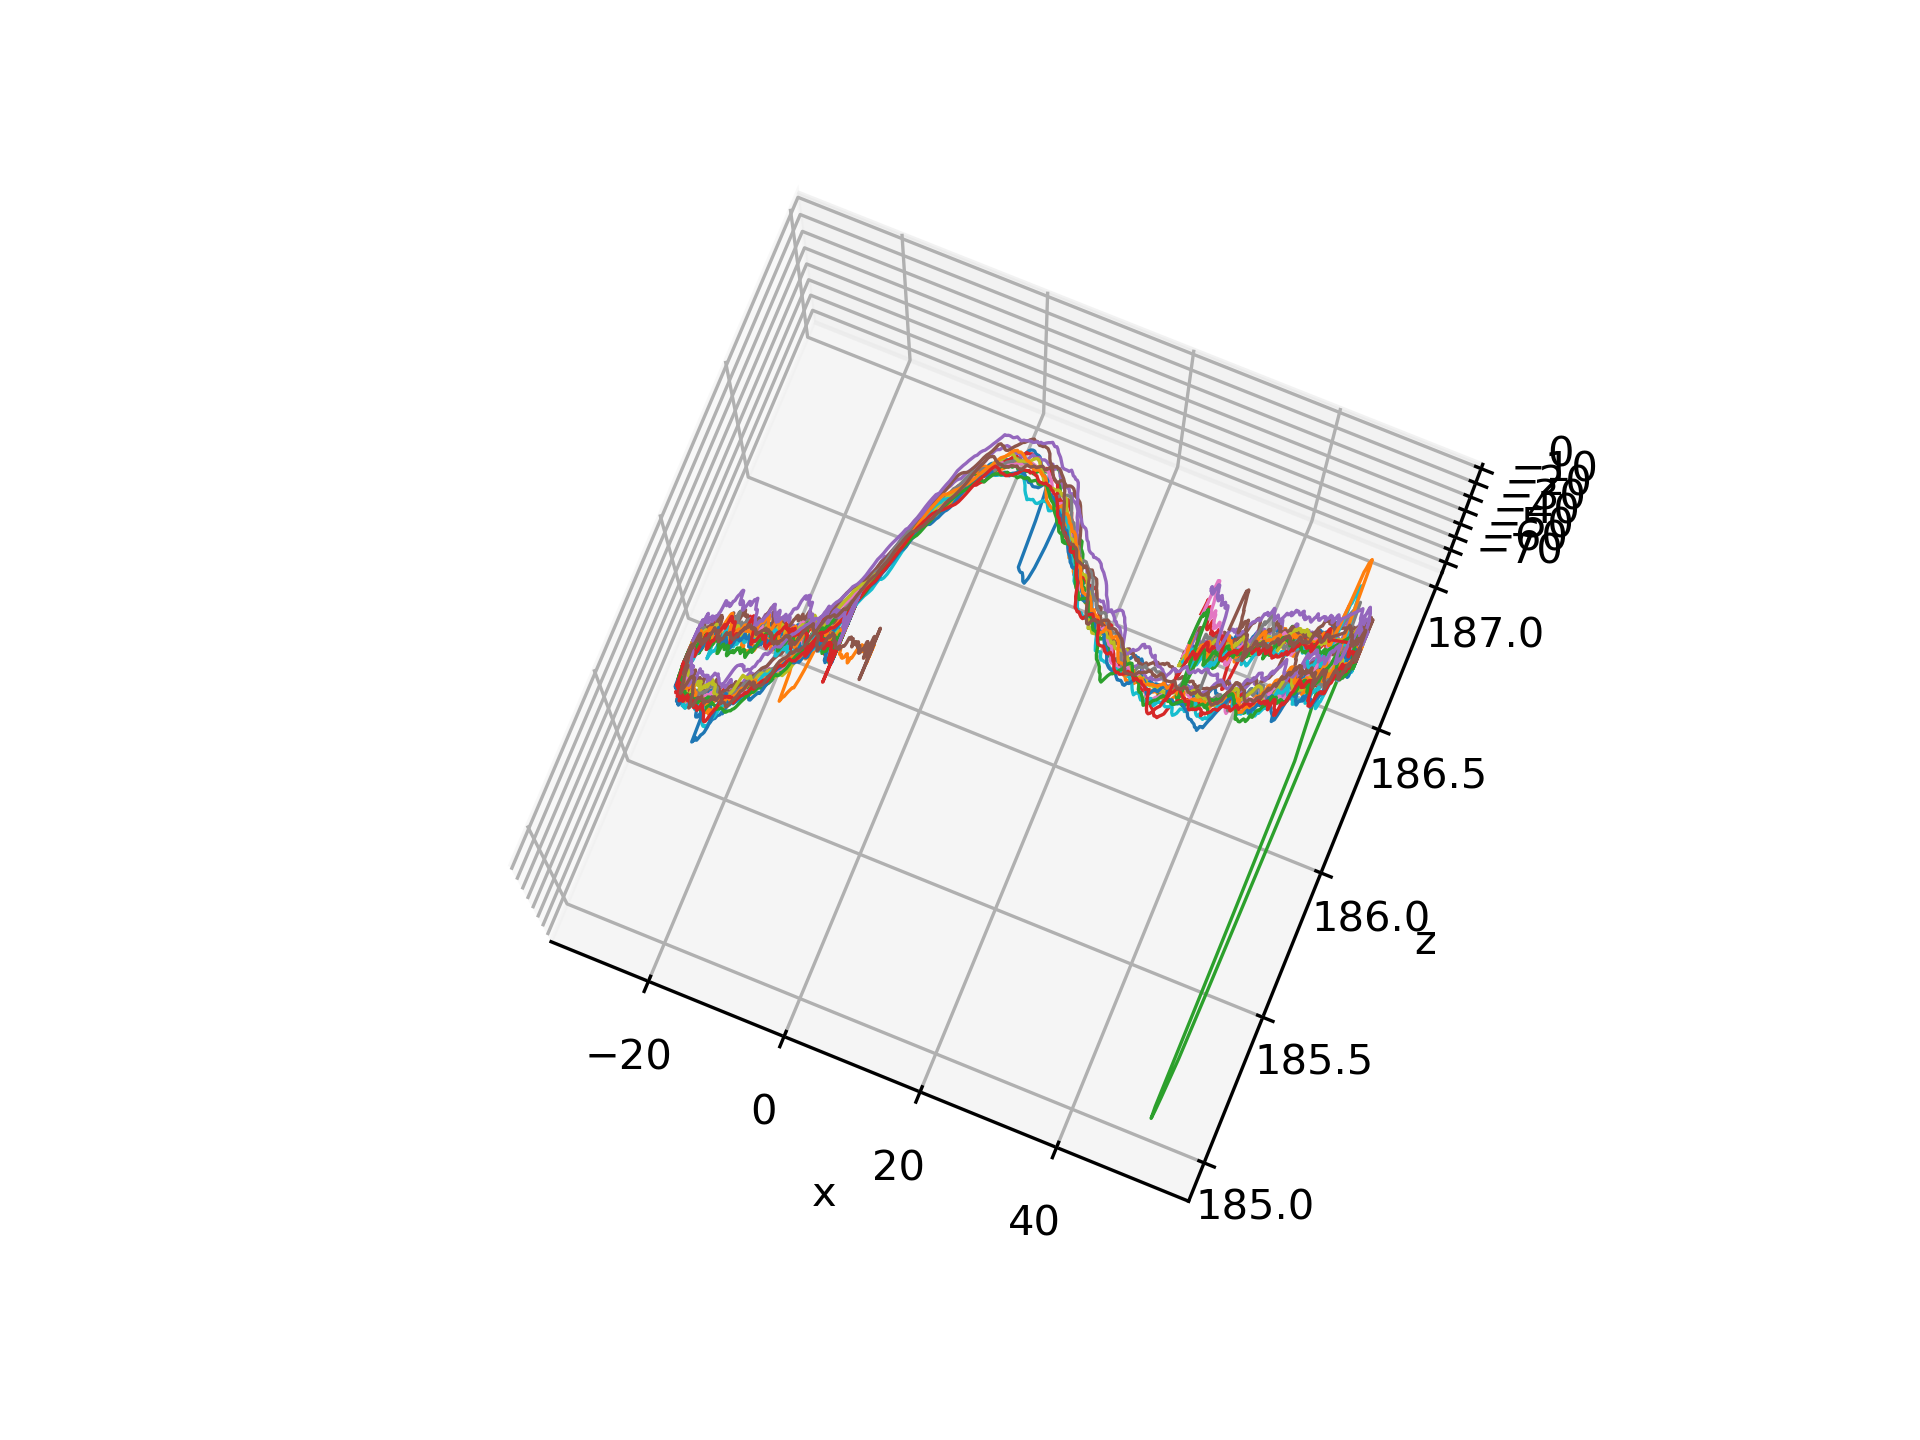

plotted: z_up_flipped_1
plotted: z_up_flipped_2
plotted: z_up_flipped_3
plotted: z_up_flipped_4
plotted: z_up_flipped_5
plotted: z_up_flipped_6
plotted: z_up_flipped_7
plotted: z_up_flipped_8
plotted: z_up_flipped_9
plotted: z_up_flipped_10
plotted: z_up_flipped_11
plotted: z_up_flipped_12
plotted: z_up_flipped_13
plotted: z_up_flipped_14
plotted: z_up_flipped_15
plotted: z_up_flipped_16


Text(0.5, 0, 'z')

In [33]:
%matplotlib notebook
# 2022-04-19_20-25-30
plt.figure(2)
ax = plt.axes(projection='3d')
## plot z_up_flipped
for n in range(16):
    file_name = "z_up_flipped_" + str(n+1)
    temp = data[file_name]
    ax.plot3D(temp['x_cm'], temp['z_cm'], temp['y_cm'], linewidth=0.8)
    print("plotted: " + file_name)
#     if(not temp[temp['z_cm']>210].empty):
#         ax.plot3D(temp['x_cm'], temp['z_cm'], temp['y_cm'], linewidth=0.5)
#         print("plotted: " + file_name)
#     else:
#         print("data values too far off: " + file_name)

plt.xlabel("x")
plt.ylabel("z")

## <span style="color:red">There was a problem with the z_up_13 file download, put into problematic data files and re-downloaded the csv from pfmd website </span>

In [13]:

# %matplotlib notebook
# plt.figure(2)
# ax = plt.axes(projection='3d')
# z_up_13 = pd.read_csv("../pfmdData/z_up_13_debug.csv")
# weird = pd.read_csv("../pfmdData/data_heatMap/z_up/2022-04-19_20-25-30.csv")

# ax.plot3D(z_up_13['x_cm'], z_up_13['z_cm'], z_up_13['y_cm'], linewidth=0.5)
# ax.show()